# Student Stress Monitoring
This dataset was found from Kaggle and the project was done as a data analysis/ML exercise. 
Objective is to predict students' stress levels using academic, personal, social and environmental factors from the dataset. We train a model using supervised methods and evaluate it using accuracy and F1. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


# Data analysis
Reading the data, checking for NaN values, checking for outliers

In [2]:

df = pd.read_csv("data/Stress_Dataset.csv")

print(df.columns.sort_values())

df = df.drop(['Have you been dealing with anxiety or tension recently?.1'], axis=1)
df = df.drop_duplicates()

print(df.dtypes)
print(df.isnull().sum()) # no nulls

categorical_features = ['Gender', 'Which type of stress do you primarily experience?']
numerical_features = df.columns.drop(categorical_features).tolist()
print(numerical_features)
print(categorical_features)

for i in df:
    print(f"Column {i}:")
    print(df[i].unique())
    print("") # age has an outlier of 100

print((df['Age'] == 100).sum()) # 3 rows with age = 100
df = df[df['Age'] != 100]

Index(['Academic and extracurricular activities conflicting for you?', 'Age',
       'Are you facing any difficulties with your professors or instructors?',
       'Are you in competition with your peers, and does it affect you?',
       'Do you attend classes regularly?',
       'Do you face any sleep problems or difficulties falling asleep?',
       'Do you feel overwhelmed with your academic workload?',
       'Do you find that your relationship often causes you stress?',
       'Do you get irritated easily?',
       'Do you have trouble concentrating on your academic tasks?',
       'Do you lack confidence in your academic performance?',
       'Do you lack confidence in your choice of academic subjects?',
       'Do you often feel lonely or isolated?',
       'Do you struggle to find time for relaxation and leisure activities?',
       'Gender', 'Have you been dealing with anxiety or tension recently?',
       'Have you been dealing with anxiety or tension recently?.1',
       'Ha

# Encoding stress types

['Eustress (Positive Stress) - Stress that motivates and enhances performance.'
 'No Stress - Currently experiencing minimal to no stress.'
 'Distress (Negative Stress) - Stress that causes anxiety and impairs well-being.']
['Distress (Negative Stress) - Stress that causes anxiety and impairs well-being.'
 'Eustress (Positive Stress) - Stress that motivates and enhances performance.'
 'No Stress - Currently experiencing minimal to no stress.']
Gender                                                                  int64
Age                                                                     int64
Have you recently experienced stress in your life?                      int64
Have you noticed a rapid heartbeat or palpitations?                     int64
Have you been dealing with anxiety or tension recently?                 int64
Do you face any sleep problems or difficulties falling asleep?          int64
Have you been getting headaches more often than usual?                  int64
Do you

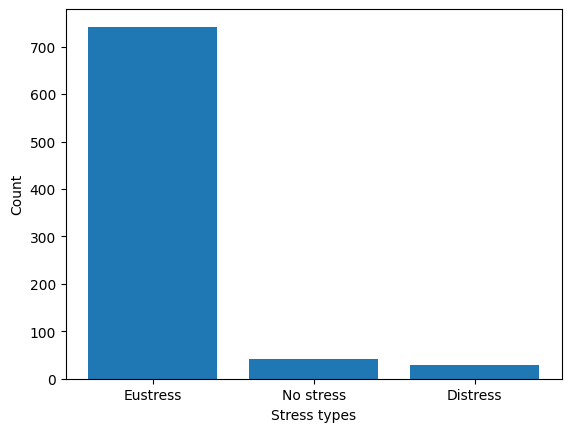

<Figure size 640x480 with 0 Axes>

In [3]:

from sklearn.preprocessing import LabelEncoder

print(df['Which type of stress do you primarily experience?'].unique())

# let's convert the target variable column to a numeric one
df.rename(columns={'Which type of stress do you primarily experience?': 'stress_type'}, inplace=True)
le = LabelEncoder()
df['stress_type'] = le.fit_transform(df['stress_type'])
print(le.classes_) # 0 distress, 1 eustress, 2 no stress

print(df.dtypes)

print(df['stress_type'].value_counts())

counts = df['stress_type'].map({0: 'Distress', 1: 'Eustress', 2: 'No stress'}).value_counts()
plt.bar(counts.index, counts.values)
plt.xlabel("Stress types")
plt.ylabel("Count")
plt.show()
plt.savefig("plot.png")

# Splitting data and oversampling target variables' class minorities

In [4]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score
from imblearn.over_sampling import SMOTE

X = df.drop(['stress_type'],axis=1)
y = df['stress_type']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

sm = SMOTE(random_state=42) # oversample minorities
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Baseline model and RandomForest with default parameters

In [5]:

# DummyClassifier
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train_res, y_train_res)
y_pred_dummy = dummy.predict(X_test)
print(classification_report(y_test, y_pred_dummy))

# RandomForestClassifier with SMOTE

print("Before smote:", y_train.value_counts())
print("After smote:", y_train_res.value_counts())

rf=RandomForestClassifier(random_state=42)
rf.fit(X_train_res,y_train_res)
y_pred_rf = rf.predict(X_test)

print(classification_report(y_test, y_pred_rf)) # 0.94 acc, macro avg 0.66
print(classification_report(y_test, y_pred_dummy)) # 0.91 acc, macro avg 0.23

              precision    recall  f1-score   support

           0       0.04      1.00      0.07         6
           1       0.00      0.00      0.00       149
           2       0.00      0.00      0.00         8

    accuracy                           0.04       163
   macro avg       0.01      0.33      0.02       163
weighted avg       0.00      0.04      0.00       163

Before smote: stress_type
1    593
2     34
0     23
Name: count, dtype: int64
After smote: stress_type
1    593
0    593
2    593
Name: count, dtype: int64
              precision    recall  f1-score   support

           0       0.50      0.17      0.25         6
           1       0.95      0.99      0.97       149
           2       1.00      0.62      0.77         8

    accuracy                           0.94       163
   macro avg       0.82      0.59      0.66       163
weighted avg       0.93      0.94      0.93       163

              precision    recall  f1-score   support

           0       0.04   

/Users/tinoseppala/Documents/Code/Notebooks/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/tinoseppala/Documents/Code/Notebooks/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/tinoseppala/Documents/Code/Notebooks/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavio

# RandomForest with tuned hyperparameters using GridSearch cv=5

In [6]:
from sklearn.model_selection import GridSearchCV # tuning RF

params_rf = {
        'n_estimators': [100, 200, 500],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(rf, params_rf, scoring='f1_macro',cv=5,n_jobs=-1, verbose=2)
grid_search.fit(X_train_res, y_train_res)

print("Best params: ", grid_search.best_params_)
print("Best macro F1: ", grid_search.best_score_) # 0.99 macro f1

y_pred_rf = grid_search.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred_rf))
print("Test set macro f1: ", f1_score(y_test, y_pred_rf, average='macro')) # didn't improve. tuned hyperparameters as good as default

Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2

# XGBoost with tuned hyperparameters using GridSearch cv=5

In [7]:

from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42)
xgb.fit(X_train_res, y_train_res)
y_pred_xgb = xgb.predict(X_test)
print(classification_report(y_test, y_pred_xgb))
print("Test set macro f1 before gridsearch: ", f1_score(y_test, y_pred_xgb, average='macro')) # 0.834

params_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6],
    'min_child_weight': [1, 3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.5],
    'reg_lambda': [1, 3],
}

grid_search = GridSearchCV(xgb, params_xgb, scoring='f1_macro',cv=5,n_jobs=-1, verbose=2)
grid_search.fit(X_train_res, y_train_res)

print("Best params: ", grid_search.best_params_)
print("Best macro F1: ", grid_search.best_score_)
y_pred_xgb = grid_search.best_estimator_.predict(X_test)

print(classification_report(y_test, y_pred_xgb))
print("Test set macro f1: ", f1_score(y_test, y_pred_xgb, average='macro')) # 0.898 macro f1. great improvement with tuned hyperparameters and resampling

              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.97      0.99      0.98       149
           2       0.80      0.50      0.62         8

    accuracy                           0.96       163
   macro avg       0.92      0.78      0.83       163
weighted avg       0.96      0.96      0.96       163

Test set macro f1 before gridsearch:  0.8348693249355502
Fitting 5 folds for each of 192 candidates, totalling 960 fits
[CV] END colsample_bytree=0.8, gamma=0, max_depth=3, min_child_weight=1, n_estimators=100, reg_lambda=1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0, max_depth=3, min_child_weight=1, n_estimators=100, reg_lambda=1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0, max_depth=3, min_child_weight=1, n_estimators=100, reg_lambda=1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0, max_depth=3, min_child_weight=1, n_estimat

# Evaluation

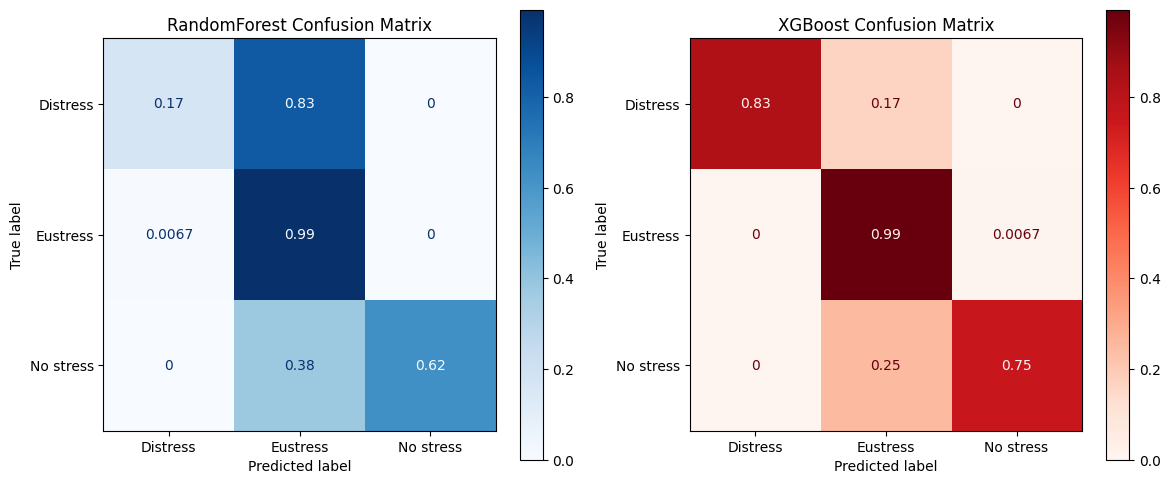

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
forest_classification = classification_report(y_test, y_pred_rf)
forest_confusion = confusion_matrix(y_test, y_pred_rf, normalize='true')
xgb_classification = classification_report(y_test, y_pred_xgb)
xgb_confusion = confusion_matrix(y_test, y_pred_xgb, normalize='true')

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
ConfusionMatrixDisplay(forest_confusion, display_labels=['Distress', 'Eustress', 'No stress']).plot(ax=axs[0], cmap='Blues')
axs[0].set_title('RandomForest Confusion Matrix')

ConfusionMatrixDisplay(xgb_confusion, display_labels=['Distress', 'Eustress', 'No stress']).plot(ax=axs[1], cmap='Reds')
axs[1].set_title('XGBoost Confusion Matrix')

plt.tight_layout()
plt.savefig('plot.png')


# Conclusion
Raw data was fairly clean having only a couple outliers. Target variable was very inbalanced and it's minorities were oversampled using SMOTE. Two models were trained with hyperparameters selected by GridSearchCV using 5 folds. RandomForest performed poor likely due to the lack of data provided for the minority labels. XGBoost performed a lot better with 83% recall for distress, 99% recall for eustress and 75% recall for no stress.